# Types of features

1- <b>Edges:</b> Transition from high to low intensity (High frequency) (Medium Quality Features) <br/>
2- <b>Corners</b> are the intersection between edges (High Quality Features) <br/>
3- <b>Blobs:</b> Region based regions/areas in an image (Low Quality Features)

# Harris Corner Detector

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils

In [25]:
def showimg(img,useOpenCV = False):
    if useOpenCV:
        cv2.imshow("Image",img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()

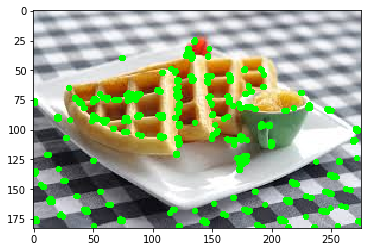

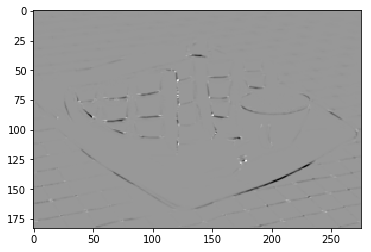

In [23]:
img = cv2.imread('./images/waffle.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

H = cv2.cornerHarris(img_gray,2,3,0.04)
keypoints = np.argwhere(H > 0.02 * H.max())
keypoints = [cv2.KeyPoint(pt[1], pt[0], 3) for pt in keypoints]

for kp in keypoints:
    (x,y) = np.int0(kp.pt)
    cv2.circle(img,(x,y),1,(0,255,0),2)

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(H, cmap='gray')
cv2.dilate(H,None)
plt.show()

# Dilation

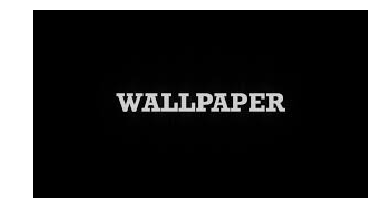

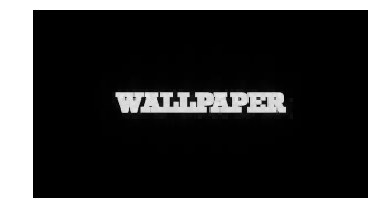

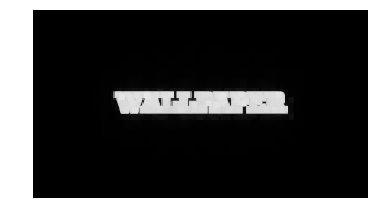

In [43]:
img = cv2.imread("./images/text.jpg")
grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

showimg(img)

for i in range(0,2):
    dialated = cv2.dilate(grey.copy(),None,iterations = i +1)
    showimg(dialated)

# Erosion 

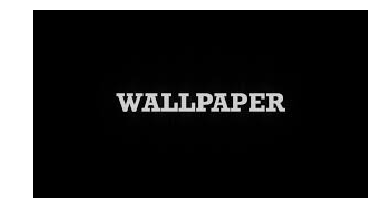

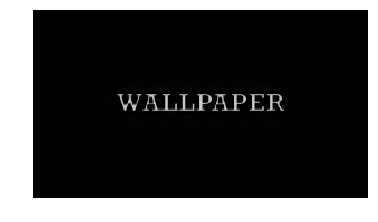

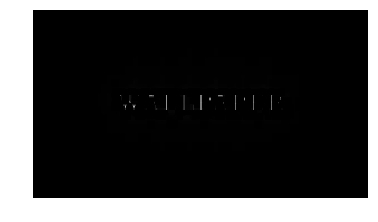

In [44]:
img = cv2.imread("./images/text.jpg")
grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

showimg(img)

for i in range(0,2):
    eroded = cv2.erode(grey.copy(),None,iterations = i +1)
    showimg(eroded)

# Openning(An erosion followed by dialation - used to remove background noise)

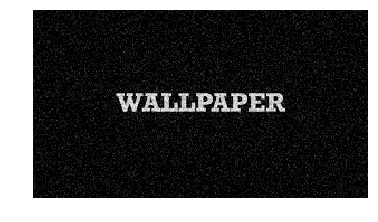

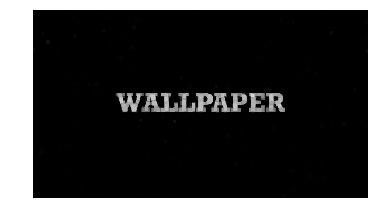

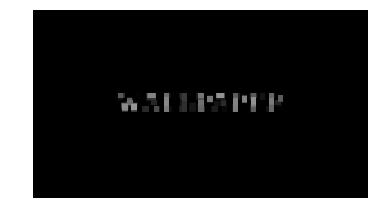

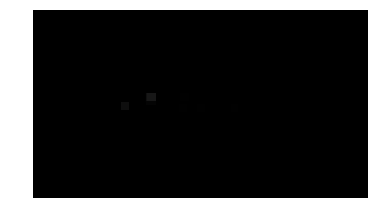

In [46]:
img = cv2.imread("./images/text_noise.jpg")
grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
showimg(grey)

kernelSizes = [(3,3),(5,5),(7,7)]

for size in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,size) #cv2.MORPH_CROSS,cv2.MORPH_ELLIPSE
    openning = cv2.morphologyEx(grey,cv2.MORPH_OPEN,kernel)
    showimg(openning)

# Closing(A dialation followed by erosion - used to close halls inside an object)

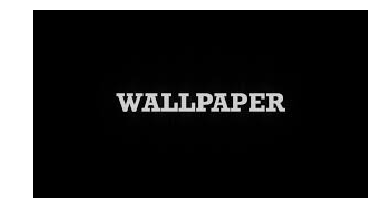

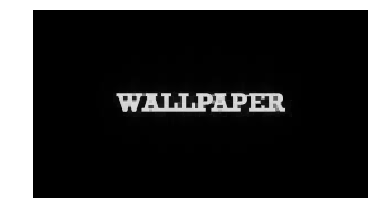

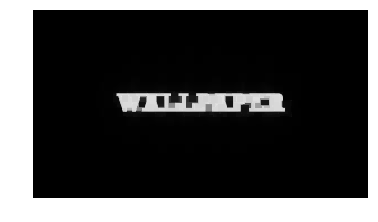

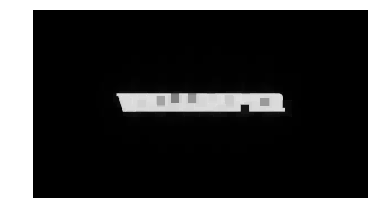

In [48]:
img = cv2.imread("./images/text.jpg")
grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
showimg(grey)

kernelSizes = [(3,3),(5,5),(7,7)]

for size in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,size)
    closing = cv2.morphologyEx(grey,cv2.MORPH_CLOSE,kernel)
    showimg(closing)

# Contours

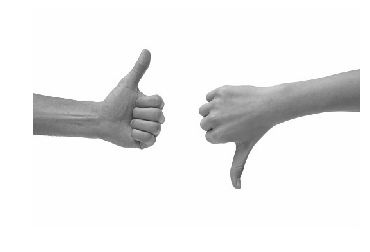

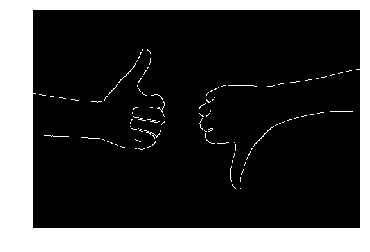

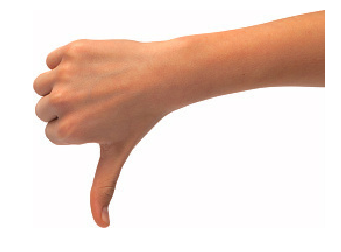

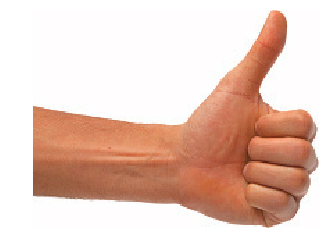

In [70]:
img = cv2.imread("./images/thumbs_up_down.jpg")
orig = img.copy()
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
showimg(img)

thresh = imutils.auto_canny(img)
showimg(thresh)

cnts = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)


for cnt in cnts:
    (x,y,w,h) = cv2.boundingRect(cnt)
    if w*h>20000:
        cropped = orig[y:y+h,x:x+w]
        showimg(cropped)
        cv2.rectangle(orig,(x,y),(x+w,y+h),(255,0,0),2)

cv2.drawContours(orig,cnts,-1,(0,0,255),2)

showimg(orig,True)